In [1]:
import os
import re

from scipy import signal
import soundfile as sf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sort a file list
# https://stackoverflow.com/a/48030307
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

In [3]:
# Check the required data
data_folder = './audio/alexa/'
audio_files = sorted_alphanumeric(os.listdir(data_folder))
print(len(audio_files))

324


In [4]:
# Calculate spectrograms
# https://www.kaggle.com/davids1992/speech-representation-and-data-exploration
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

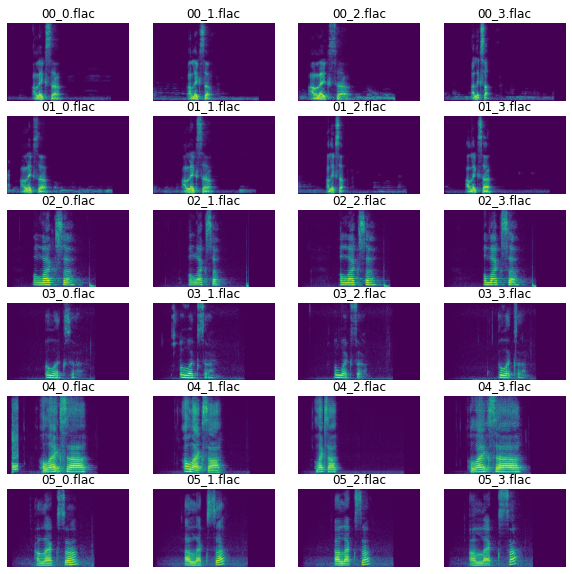

In [5]:
# Visualize audio files
fig = plt.figure(figsize=(10,10))

for i, audio_file in enumerate(audio_files[:24]):
    # Make subplots
    plt.subplot(6,4,i+1)
    
    # Pull the labels
    label = audio_file
    plt.title(label)
    
    # Create spectogram
    data, samplerate = sf.read(data_folder + audio_file)
    _, spectrogram = log_specgram(data, samplerate)
        
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.axis('off')

In [6]:
# # Save spectrograms
# fig = plt.figure(figsize=(10,10))
# for audio_file in audio_files:
#     data, samplerate = sf.read(data_folder + audio_file)
#     _, spectrogram = log_specgram(data, samplerate)
#     plt.imshow(spectrogram.T, aspect='auto', origin='lower')
#     plt.axis('off')
#     plt.savefig(f"./spectrogram/{audio_file}.png", bbox_inches='tight', pad_inches=0)

In [7]:
# # Reorganize audio files into folders
# audio_files = sorted_alphanumeric(os.listdir('./audio/alexa/'))

# for i in range(len(audio_files)):
#     person =  '%02d' % math.floor(i/4)
#     try: 
#         os.mkdir(f"./audio/alexa/{person}") 
#     except OSError as error: 
#         pass
#     os.rename(f"./audio/alexa/{audio_files[i]}", f"./audio/alexa/{person}/{audio_files[i]}")

In [8]:
# # Reorganize spectrograms into folders
# spectrograms = sorted_alphanumeric(os.listdir('./spectrogram/'))

# for i in range(len(spectrograms)):
#     person =  '%02d' % math.floor(i/4)
#     try: 
#         os.mkdir(f"./spectrogram/{person}") 
#     except OSError as error: 
#         pass
#     os.rename(f"./spectrogram/{spectrograms[i]}", f"./spectrogram/{person}/{spectrograms[i]}")